In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
df = pd.read_csv('data/top_10_EB_data.csv', low_memory = False)

In [ ]:
df.drop(['Unnamed: 0', 'category_code_4', 'user_top_10'], axis=1, inplace = True)

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3
0,2019-11-01 00:00:19 UTC,view,26100002,2053013553887052089,NaN,sulu,51.48,520956879,88e782d0-cb8f-4b25-b09c-6dd9bce06832,3,NaN,NaN,NaN
1,2019-11-01 00:01:46 UTC,view,39700019,2084962304016777941,apparel.costume,NaN,136.43,516426931,b36a7084-888d-4e37-bad4-cec9cfb1fbce,4,apparel,NaN,costume
2,2019-11-01 00:02:02 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,electronics,NaN,smartphone
3,2019-11-01 00:02:36 UTC,view,5100816,2053013553375346967,NaN,xiaomi,29.58,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,NaN,NaN,NaN
4,2019-11-01 00:02:56 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383214,2019-11-30 23:59:41 UTC,view,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum
3383215,2019-11-30 23:59:43 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2,electronics,NaN,smartphone
3383216,2019-11-30 23:59:44 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum
3383217,2019-11-30 23:59:44 UTC,purchase,26205399,2053013563693335403,NaN,NaN,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,16,NaN,NaN,NaN


In [2]:
df['category_code'] = df['category_code'].fillna('etc') #category_code nan값 etc로 대체

df['brand'] = df['brand'].fillna('etc') #brand nan값 etc로 대체

df

NameError: name 'df' is not defined

In [24]:
purchase_df = df.query('event_type == "purchase"') #구매 데이터
sum_user_id_purchase= purchase_df.groupby('user_id').agg(sum_price=('price', 'sum')) #user_id별 구매데이터
sum_user_id_purchase.sort_values('sum_price', ascending=False) #내림차순으로 정렬

,sum_price
user_id,
518514099,203986.07
512386086,160092.24
564068124,131929.20
515715331,117130.12
521230795,111072.35
...,...
527041033,1364.00
572139843,1364.00
543040874,1364.00


# Event_Type

In [302]:
from platform import python_version

print(python_version())

# 그래프에 한글 폰트 설정
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정
rcParams["figure.figsize"] = (10,3)

3.10.8


In [36]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3
0,2019-11-01 00:00:19 UTC,view,26100002,2053013553887052089,etc,sulu,51.48,520956879,88e782d0-cb8f-4b25-b09c-6dd9bce06832,3,NaN,NaN,NaN
1,2019-11-01 00:01:46 UTC,view,39700019,2084962304016777941,apparel.costume,etc,136.43,516426931,b36a7084-888d-4e37-bad4-cec9cfb1fbce,4,apparel,NaN,costume
2,2019-11-01 00:02:02 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,electronics,NaN,smartphone
3,2019-11-01 00:02:36 UTC,view,5100816,2053013553375346967,etc,xiaomi,29.58,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,NaN,NaN,NaN
4,2019-11-01 00:02:56 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383214,2019-11-30 23:59:41 UTC,view,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum
3383215,2019-11-30 23:59:43 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2,electronics,NaN,smartphone
3383216,2019-11-30 23:59:44 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum
3383217,2019-11-30 23:59:44 UTC,purchase,26205399,2053013563693335403,etc,etc,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,16,NaN,NaN,NaN


In [47]:
count_event_type = df['event_type'].value_counts()
count_event_type

view        2626336
cart         474725
purchase     282158
Name: event_type, dtype: int64

Text(0, 0.5, 'Number')

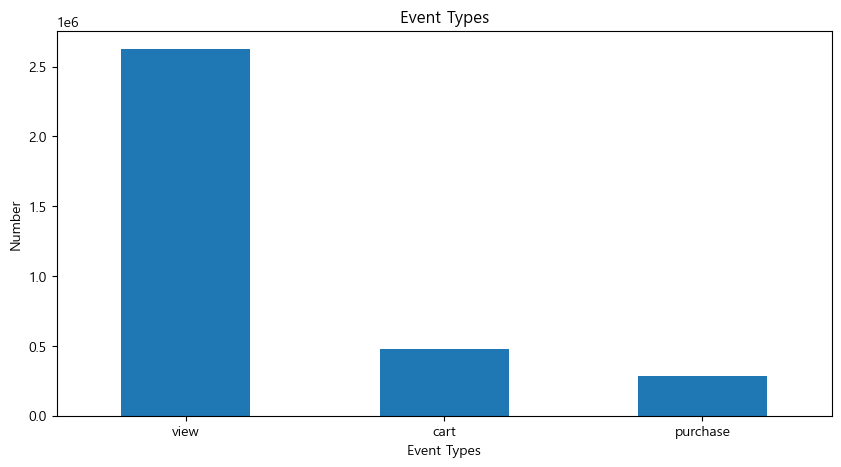

In [229]:
ax = count_event_type.plot.bar(rot=0, figsize=(10,5), title = 'Event Types')
ax.set_xlabel("Event Types")
ax.set_ylabel("Number")

In [66]:
# 평균 구매 전환율 -> total purchase / total view (cvr = conversion rate = 전환율)
avg_cvr_pv = (count_event_type['purchase']/count_event_type['view']) * 100 
avg_cvr_pv

10.743408307238678

In [67]:
# 평균 카트 전환율 -> total cart / total view
avg_cvr_cv = (count_event_type['cart']/count_event_type['view']) * 100 
avg_cvr_cv

18.07556230429008

In [68]:
# 평균 카트 구매 전환율 -> total cart / total view
avg_cvr_pc = (count_event_type['purchase']/count_event_type['cart']) * 100 
avg_cvr_pc

59.43609458107325

#  Event_type 별 가장 많은 top 10

## Event_type vs Brand

Text(0, 0.5, 'Purchase Count')

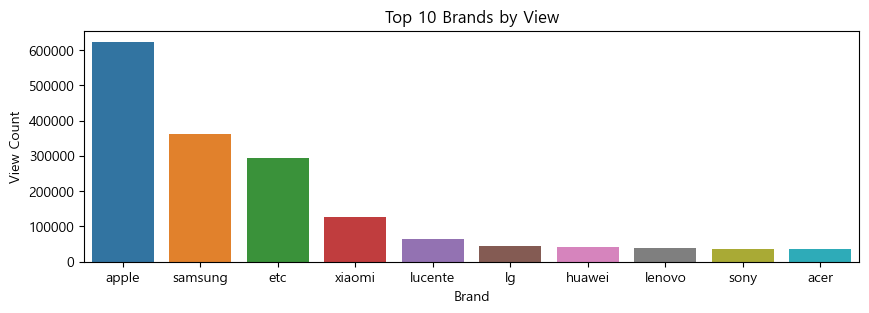

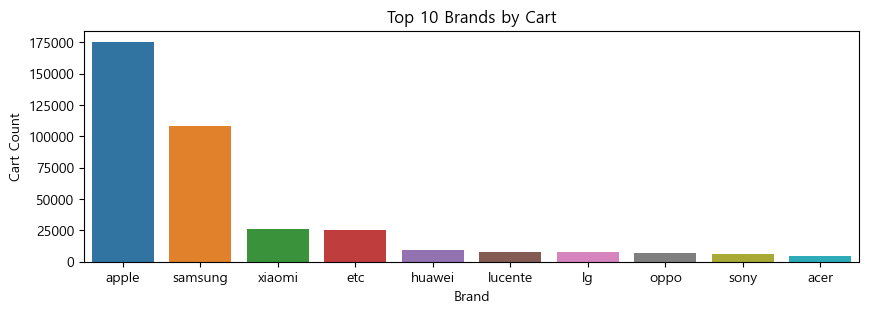

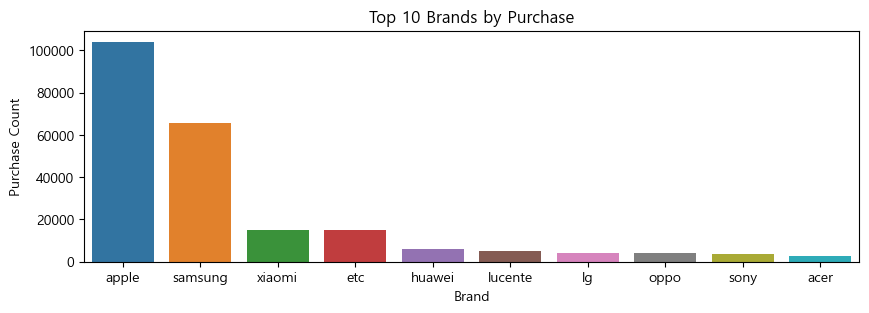

In [319]:
# view 별 브랜드 top 10
view = df.query('event_type=="view"')
top10_brand_view = view['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_view_DF = pd.DataFrame()
top10_brand_view_DF['brand'] = top10_brand_view.index
top10_brand_view_DF['count'] = top10_brand_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_view_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by View')
ax.set_xlabel('Brand')
ax.set_ylabel('View Count')




# cart 별 브랜드 top 10
cart = df.query('event_type=="cart"')
top10_brand_cart = cart['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_cart_DF = pd.DataFrame()
top10_brand_cart_DF['brand'] = top10_brand_cart.index
top10_brand_cart_DF['count'] = top10_brand_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_cart_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by Cart')
ax.set_xlabel('Brand')
ax.set_ylabel('Cart Count')




# purchase 별 브랜드 top 10
purchase = df.query('event_type=="purchase"')
top10_brand_purchase = purchase['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_purchase_DF = pd.DataFrame()
top10_brand_purchase_DF['brand'] = top10_brand_purchase.index
top10_brand_purchase_DF['count'] = top10_brand_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by Purchase')
ax.set_xlabel('Brand')
ax.set_ylabel('Purchase Count')

## Event_type vs Product_id

Text(0, 0.5, 'Puchase Count')

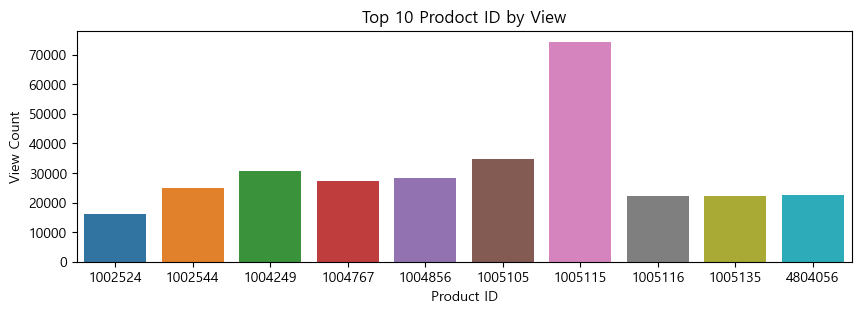

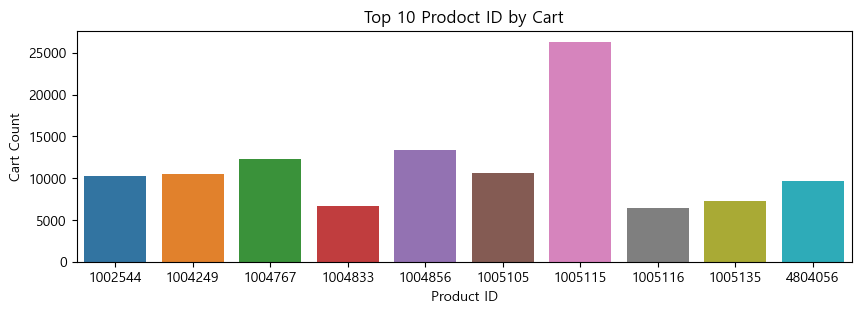

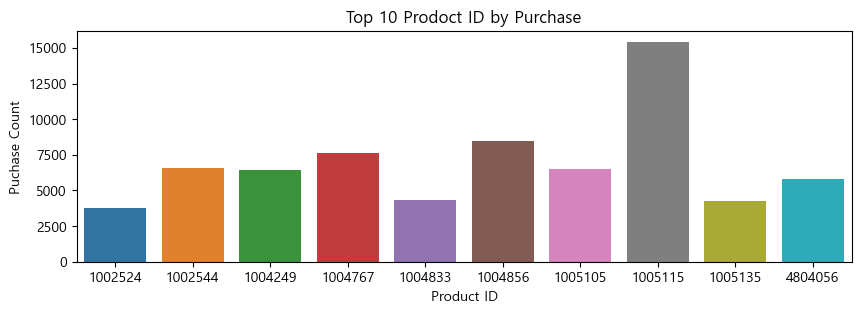

In [326]:
# view 별 Product_id top 10
view = df.query('event_type=="view"')
top10_product_id_view = view['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_view_DF = pd.DataFrame()
top10_product_id_view_DF['brand'] = top10_product_id_view.index
top10_product_id_view_DF['count'] = top10_product_id_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_view_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by View')
ax.set_xlabel('Product ID')
ax.set_ylabel('View Count')




# cart 별 Product_id top 10
cart = df.query('event_type=="cart"')
top10_product_id_cart = cart['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_cart_DF = pd.DataFrame()
top10_product_id_cart_DF['brand'] = top10_product_id_cart.index
top10_product_id_cart_DF['count'] = top10_product_id_cart.to_list()


#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_cart_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by Cart')
ax.set_xlabel('Product ID')
ax.set_ylabel('Cart Count')




# purchase 별 Product_id top 10
purchase = df.query('event_type=="purchase"')
top10_product_id_purchase = purchase['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_purchase_DF = pd.DataFrame()
top10_product_id_purchase_DF['brand'] = top10_product_id_purchase.index
top10_product_id_purchase_DF['count'] = top10_product_id_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by Purchase')
ax.set_xlabel('Product ID')
ax.set_ylabel('Puchase Count')

## Event_type vs Category_Code_1

Text(0, 0.5, 'Purchase Count')

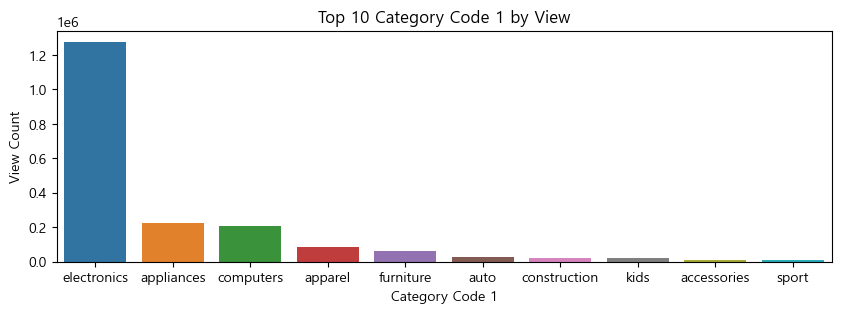

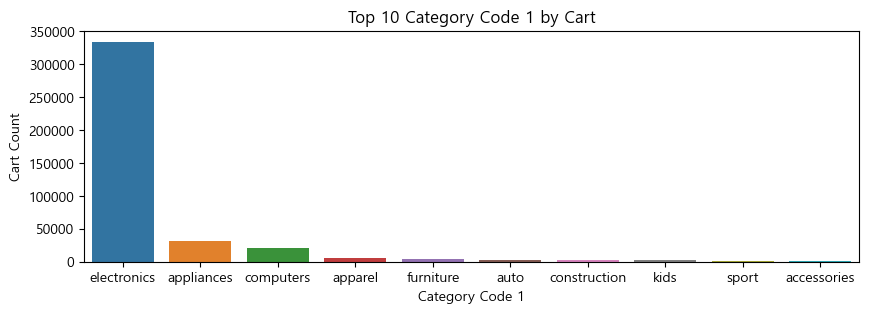

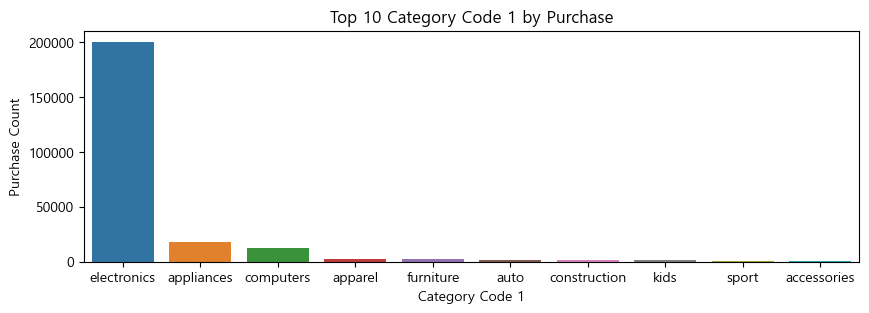

In [306]:
# view 별 Category_code top 10
view = df.query('event_type=="view"')
top10_category_code_1_view = view['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_view_DF = pd.DataFrame()
top10_category_code_1_view_DF['category_code_1'] = top10_category_code_1_view.index
top10_category_code_1_view_DF['count'] = top10_category_code_1_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_view_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by View')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('View Count')




# Cart 별 Category_code top 10
cart = df.query('event_type=="cart"')
top10_category_code_1_cart = cart['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_cart_DF = pd.DataFrame()
top10_category_code_1_cart_DF['category_code_1'] = top10_category_code_1_cart.index
top10_category_code_1_cart_DF['count'] = top10_category_code_1_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_cart_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by Cart')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('Cart Count')




# purchase 별 Category_code top 10
purchase = df.query('event_type=="purchase"')
top10_category_code_1_purchase = purchase['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_purchase_DF = pd.DataFrame()
top10_category_code_1_purchase_DF['category_code_1'] = top10_category_code_1_purchase.index
top10_category_code_1_purchase_DF['count'] = top10_category_code_1_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_purchase_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by Purchase')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('Purchase Count')

## Event_type vs User_ID

Text(0, 0.5, 'Cart Count')

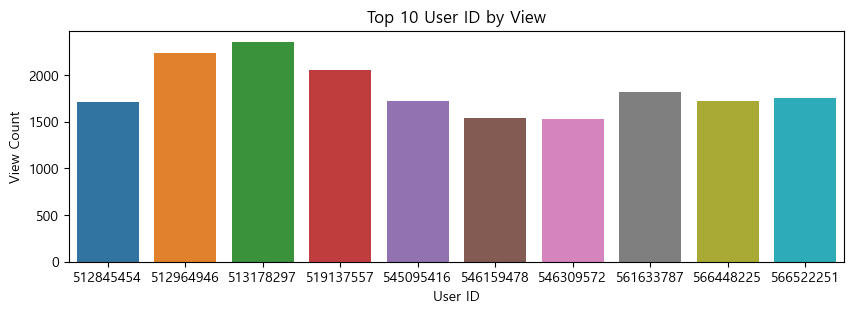

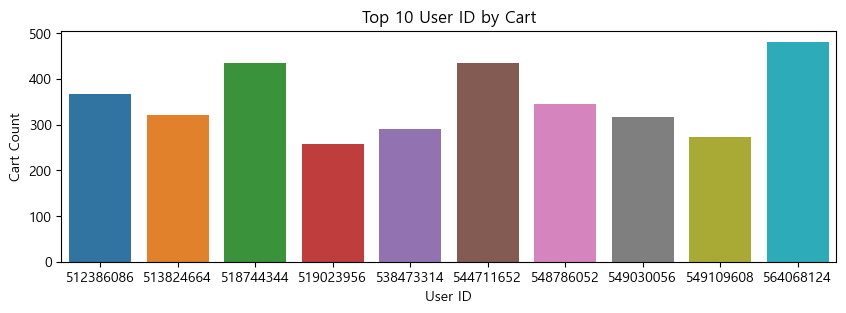

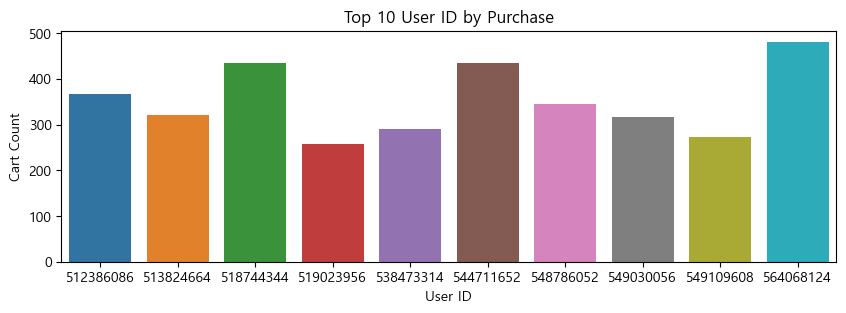

In [324]:
# View 별 User_ID Top 10
view = df.query('event_type=="view"')
top10_user_id_view = view['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_view_DF = pd.DataFrame()
top10_user_id_view_DF['user_id'] = top10_user_id_view.index
top10_user_id_view_DF['count'] = top10_user_id_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_view_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by View')
ax.set_xlabel('User ID')
ax.set_ylabel('View Count')

# Cart 별 User_ID Top 10
cart = df.query('event_type=="cart"')
top10_user_id_cart = cart['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_cart_DF = pd.DataFrame()
top10_user_id_cart_DF['user_id'] = top10_user_id_cart.index
top10_user_id_cart_DF['count'] = top10_user_id_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_cart_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by Cart')
ax.set_xlabel('User ID')
ax.set_ylabel('Cart Count')

# Purchase 별 User_ID Top 10
purchase = df.query('event_type=="purchase"')
top10_user_id_purchase = purchase['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_purchase_DF = pd.DataFrame()
top10_user_id_purchase_DF['user_id'] = top10_user_id_cart.index
top10_user_id_purchase_DF['count'] = top10_user_id_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_purchase_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by Purchase')
ax.set_xlabel('User ID')
ax.set_ylabel('Cart Count')

## Event_type vs User_Session

Text(0, 0.5, 'Purchase Count')

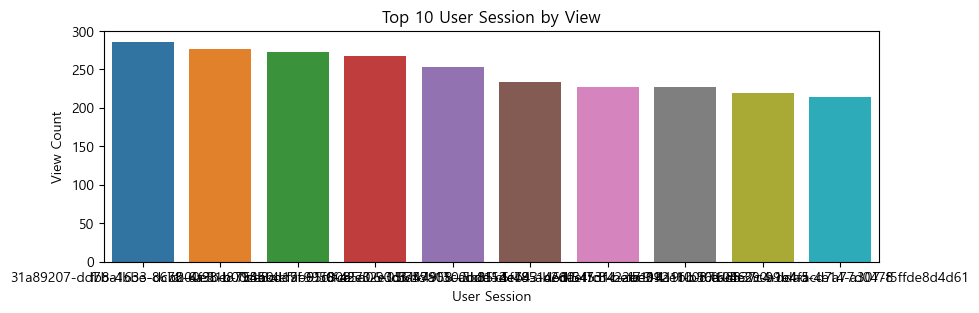

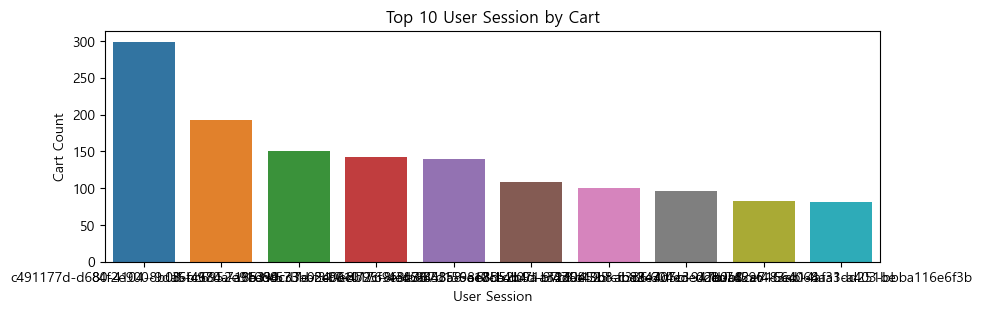

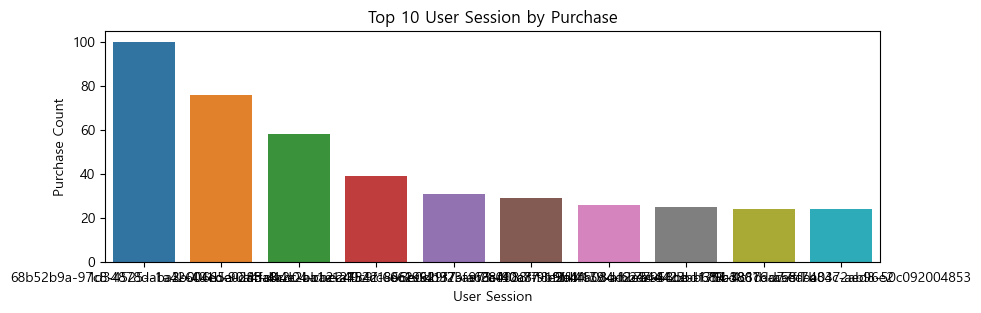

In [303]:
# View 별 User_Session Top 10
view = df.query('event_type=="view"')
top10_user_session_view = view['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_view_DF = pd.DataFrame()
top10_user_session_view_DF['user_session'] = top10_user_session_view.index
top10_user_session_view_DF['count'] = top10_user_session_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_view_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by View')
ax.set_xlabel('User Session')
ax.set_ylabel('View Count')





# Cart 별 User_Session Top 10
cart = df.query('event_type=="cart"')
top10_user_session_cart = cart['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_cart_DF = pd.DataFrame()
top10_user_session_cart_DF['user_session'] = top10_user_session_cart.index
top10_user_session_cart_DF['count'] = top10_user_session_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_cart_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by Cart')
ax.set_xlabel('User Session')
ax.set_ylabel('Cart Count')





# Purchase 별 User_Session Top 10
purchase = df.query('event_type=="purchase"')
top10_user_session_purchase = purchase['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_purchase_DF = pd.DataFrame()
top10_user_session_purchase_DF['user_session'] = top10_user_session_purchase.index
top10_user_session_purchase_DF['count'] = top10_user_session_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_purchase_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by Purchase')
ax.set_xlabel('User Session')
ax.set_ylabel('Purchase Count')